<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/R14_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

두집단의 비교

In [1]:
# ex) 독립표본 x, y 에 대해 정규성, 등분산성을 확인하시오
x <- c(175,168,168,190,156,181,182,175,174,179)
y <- c(185,169,173,173,188,186,175,174,179,180)

In [3]:
shapiro.test(x) # p > 0.05 이므로 h0 채택(정규성이 있음)


	Shapiro-Wilk normality test

data:  x
W = 0.96351, p-value = 0.825


In [4]:
shapiro.test(y) # p > 0.05 이므로 h0 채택(정규성이 있음)


	Shapiro-Wilk normality test

data:  y
W = 0.93065, p-value = 0.4543


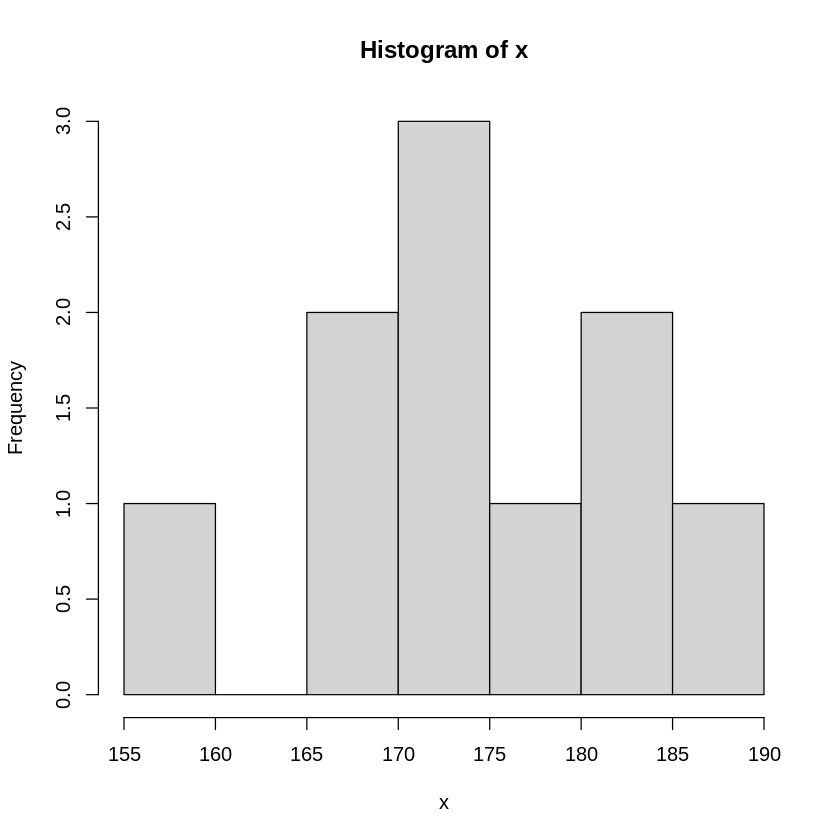

In [5]:
hist(x)

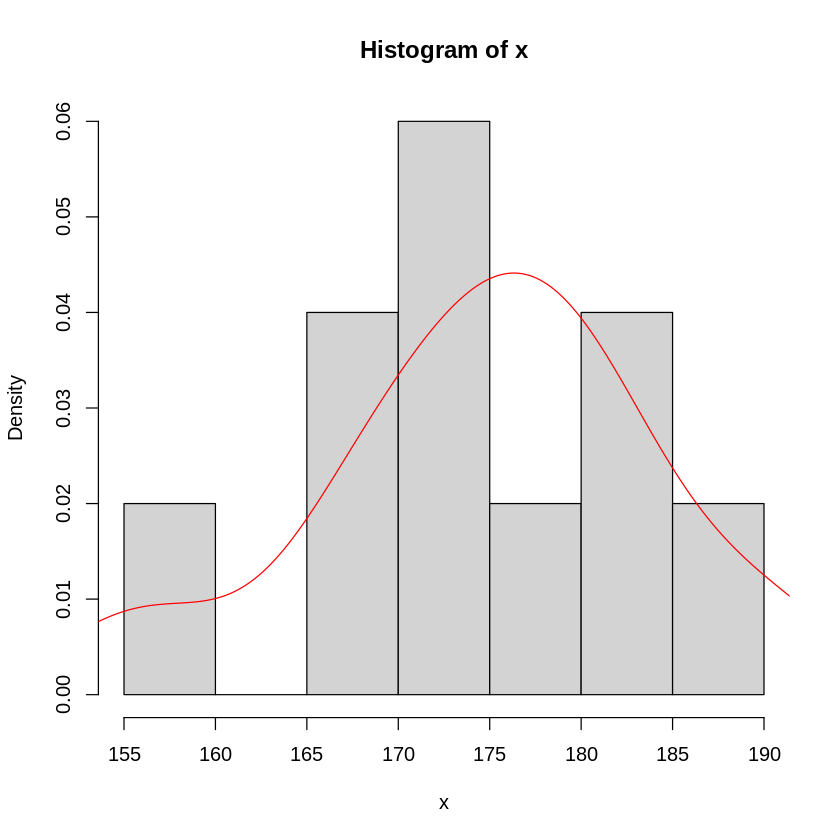

In [6]:
hist(x, probability = T)
lines(density(x), col = 'red')

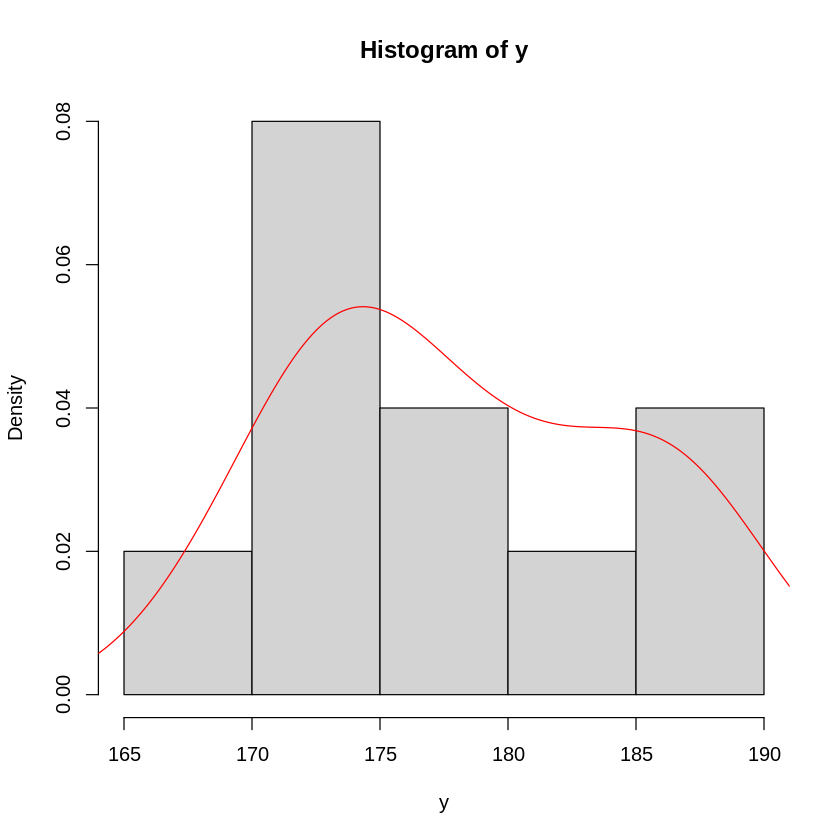

In [7]:
hist(y, probability = T)
lines(density(y), col = 'red')

In [8]:
var.test(x,y) # p > 0.05 이므로 h0 채택(등분산성이 있음)


	F test to compare two variances

data:  x and y
F = 2.1028, num df = 9, denom df = 9, p-value = 0.2834
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5223017 8.4657950
sample estimates:
ratio of variances 
          2.102784 


두 독립표본을 이용한 가설검증
- 서로 다른 2개의 표본간의 평균 차이가 유의미한지 판단이 목적
- t.test(표본1, 표본2, 등분산여부, 신뢰범위)

예) 자동자 연비 데이터 mtcars에서 기어 종류(am)에 따라 평균 연비(mpg)의 차이에 의미가 있는지 검정

In [9]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [10]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [14]:
auto <- mtcars %>% filter(am == 0) %>% select(mpg)
auto

,mpg
,<dbl>
Hornet 4 Drive,21.4
Hornet Sportabout,18.7
Valiant,18.1
Duster 360,14.3
Merc 240D,24.4
Merc 230,22.8
Merc 280,19.2
Merc 280C,17.8
Merc 450SE,16.4


In [16]:
manual <- mtcars[mtcars$am == 1, 'mpg']
manual

[1] 21.0 21.0 22.8 32.4 30.4 33.9 27.3 26.0 30.4 15.8 19.7 15.0 21.4

정규선, 등분산성 만족여부 평가

In [19]:
shapiro.test(auto$mpg) # p > 0.05 이므로 H0 채택(정규성있음)


	Shapiro-Wilk normality test

data:  auto$mpg
W = 0.97677, p-value = 0.8987


In [20]:
shapiro.test(manual)  # p > 0.05 이므로 H0 채택(정규성있음)


	Shapiro-Wilk normality test

data:  manual
W = 0.9458, p-value = 0.5363


In [21]:
var.test(auto$mpg, manual)  # p > 0.05 이므로 H0 채택(등분산성이있음)


	F test to compare two variances

data:  auto$mpg and manual
F = 0.38656, num df = 18, denom df = 12, p-value = 0.06691
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1243721 1.0703429
sample estimates:
ratio of variances 
         0.3865615 


In [22]:
t.test(auto$mpg, manual, var.equal = T, alternative = 'two.sided') # (양측) p < 0.025 으로 h0 기각, 두집단(auto, manual)의 차이가 있다!!


	Two Sample t-test

data:  auto$mpg and manual
t = -4.1061, df = 30, p-value = 0.000285
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.84837  -3.64151
sample estimates:
mean of x mean of y 
 17.14737  24.39231 


[결론] 자동/수동 간 연비의 차이는 확률적으로 존재함


ex) 잔디 깍기 기계 생산 공장에서 작업시간 단축을 위해 2가지 공정이 제안되었음
A 공정방식은 5명의 근로자에 의해, B 공정방식은 6명의 근로자에 의해 
각각 테스트가 진행되었을때, 작업시간의 차이가 있는지 검정하시오. 

- 유의수준 0.10을 사용한다
- A 공정 : 2 4 9 3 2 (단위: 분)
- B 공정 : 3 7 5 8 4 3

- 귀무가설 : 각 공정방식에 의한 평균 작업시간의 차이가 없다
- 대립가설 : 각 공정방식에 의한 평균 작업시간의 차이가 있다
- 독립표본 t검정시 자유도df : (n1-1) + (n2-1)


In [24]:
a <- c(2,4,9,3,2)
b <- c(3,7,5,8,4,3)

In [25]:
shapiro.test(a) # (양측) p > 0.05 므로, 정규성있음


	Shapiro-Wilk normality test

data:  a
W = 0.77559, p-value = 0.0505


In [26]:
shapiro.test(b) # (양측) p > 0.05 므로, 정규성있음


	Shapiro-Wilk normality test

data:  b
W = 0.89041, p-value = 0.3204


In [27]:
var.test(a,b) # (양측) p > 0.05 므로, 등분산성 있음


	F test to compare two variances

data:  a and b
F = 1.9318, num df = 4, denom df = 5, p-value = 0.4871
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.2614846 18.0904550
sample estimates:
ratio of variances 
          1.931818 


In [33]:
t.test(a,b,var.equal = T, alternative = 'two.sided') # (양측) p > 0.05 으로 h0 기각


	Two Sample t-test

data:  a and b
t = -0.66205, df = 9, p-value = 0.5245
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.416892  2.416892
sample estimates:
mean of x mean of y 
        4         5 


결론 : 각 공정방식에 의한 평균 작업시간의 차이가 있다

Tip) t 분포표를 활용하려 검증하기


ex) 영업사원과 감사부사원의 하루 출장비에 차이가 있는지 검정하시오 (유의수준 0.10)
-  sales : 131 135 146 165 136 142
-  audits : 130 102 129 143 149 120 139  
-  영업부서가 감사부서보다 출장비가 많다고 할 수 있는가?

- 귀무가설 : 영업부서가 감사부서보다 출장비가 같거나 작다 (<=)
- 대립가설 : 영업부서가 감사부서보다 출장비가 많다 (>)


In [29]:
sales <- c(131,135,146,165,136,142)
audits <- c(130, 102, 129, 143, 149, 120, 139)

In [30]:
shapiro.test(sales) # 단측 p > 0.1 , 정규성 있음


	Shapiro-Wilk normality test

data:  sales
W = 0.86611, p-value = 0.2111


In [31]:
shapiro.test(audits) # 단측 p > 0.1 , 정규성 있음


	Shapiro-Wilk normality test

data:  audits
W = 0.94875, p-value = 0.7183


In [32]:
var.test( sales, audits) # 단측 p > 0.1 , 등분산성 있음


	F test to compare two variances

data:  sales and audits
F = 0.60143, num df = 5, denom df = 6, p-value = 0.5934
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.100447 4.196620
sample estimates:
ratio of variances 
         0.6014329 


In [38]:
t.test( sales, audits, var.equal = T,  alternative = 'greater') 


	Two Sample t-test

data:  sales and audits
t = 1.5368, df = 11, p-value = 0.0763
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.059213       Inf
sample estimates:
mean of x mean of y 
 142.5000  130.2857 


- (단측) p < 0.1 이므로 H0 기각  
- (단측) t-분포표 기준(df:11, 0.1) 1.363 보다 t값 1.5368 이 크므로 H0 기각
* https://github.com/siestageek/datasets/blob/master/img/t-table-1.png
- 결론 : 영업부서가 감사부서보다 출장비가 많다

ex) 모델회사의 두 모델 수입이 다음과 같을때
-  kim이라는 모델이 park 이라는 모델의 수입보다 크다고 할수 있는지
-  유의수준 0.05로 검정하시오

In [40]:
kim <- c(5, 4.5, 3.4, 3.4, 6, 3.3, 4.5, 4.6, 3.5, 5.2, 4.8, 4.4, 4.6, 3.6, 5.0)
park <- c(3.1, 3.7, 3.6, 4.0, 3.8, 3.8, 5.9, 4.9, 3.6, 3.6, 2.3, 4.0)

In [41]:
shapiro.test(kim) # 단측) p > 0.05 므로 정규성있음


	Shapiro-Wilk normality test

data:  kim
W = 0.91964, p-value = 0.1902


In [42]:
shapiro.test(park) # 단측) p > 0.05 므로 정규성있음


	Shapiro-Wilk normality test

data:  park
W = 0.88556, p-value = 0.1033


In [43]:
var.test(kim, park) # 단측) p > 0.05 므로 정규성있음


	F test to compare two variances

data:  kim and park
F = 0.8141, num df = 14, denom df = 11, p-value = 0.7055
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2423783 2.5193144
sample estimates:
ratio of variances 
         0.8141029 


In [45]:
# H0 : kim이라는 모델이 park 이라는 모델의 수입보다 작거나 같다
# H1 : kim이라는 모델이 park 이라는 모델의 수입보다 크다
t.test(kim, park, var.equal = T, alternative = "greater")


	Two Sample t-test

data:  kim and park
t = 1.6367, df = 25, p-value = 0.05711
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.02305228         Inf
sample estimates:
mean of x mean of y 
 4.386667  3.858333 


(단측) p > 0.05 므로 H0 채택, kim이라는 모델이 park 이라는 모델의 수입보다 크다고 할 수 없음 


In [49]:
mean(kim);mean(park)

[1] 4.386667

[1] 3.858333

# 2. 짝paired 표본을 이용한 가설검정
- 동일한 집단의 전/후 차이를 비교하기 위해 사용
- 짝paired 표본 : 동일한 모집단으로 부터 추출된 서로 연관있는 2개의 표본을 의미
- 주의점 : 짝paired 표본의 갯수는 서로 동일해야 함
- t.test paired

In [50]:
# ex) 10명 학생의 과외 받기 전/후 수학 
# 성적차이를 비교하시오 (유의수준 0.05)

before <- c(16,20,21,22,23,22,27,25,27,28)
after <- c(19,22,24,24,25,25,26,26,28,32)

In [51]:
shapiro.test(before) # p > 0.025, 정규성 있음


	Shapiro-Wilk normality test

data:  before
W = 0.94809, p-value = 0.6459


In [52]:
shapiro.test(after) # p > 0.025, 정규성 있음


	Shapiro-Wilk normality test

data:  after
W = 0.95546, p-value = 0.7332


In [53]:
var.test(before, after) # p > 0.025, 등분산성 있음


	F test to compare two variances

data:  before and after
F = 1.1684, num df = 9, denom df = 9, p-value = 0.8205
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2902095 4.7038978
sample estimates:
ratio of variances 
          1.168382 


In [54]:
t.test( before, after, paired = T, alternative = c('two.sided'))


	Paired t-test

data:  before and after
t = -4.4721, df = 9, p-value = 0.00155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.0116674 -0.9883326
sample estimates:
mean of the differences 
                     -2 


- H0 : 차이가 없다
- H1 : 차이가 있다
- p < 0.025 므로 H0 기각, 성적 차이가 있다!
- t분포표 기준 : 임계값 (-2.262, 2.262), t값 ( -4.4721) 므로 H0 기각

ex) 상호금융회사는 부동산 가치 평가를 위해 2개의 평가회사를 고용했음
임의로 10채의 주택을 추출해서 각 회사에 주택 가치평가 의뢰 
평가 회사별 가치 평가 차이가 있는가? 유의수준 0.05로 검정하시오  

In [55]:
w <- c(235, 210, 231, 242, 205, 230, 231, 210, 225, 249)
s <- c(228, 205, 219, 240, 198, 223, 227, 215, 222, 245)

- H0 : 각 회사에 주택 가치평가 의뢰 평가 회사별 가치 평가 차이가 없다
- H1 : 각 회사에 주택 가치평가 의뢰 평가 회사별 가치 평가 차이가 있다

In [56]:
shapiro.test(w) # 양측, p > 0.025 , 정규성있음


	Shapiro-Wilk normality test

data:  w
W = 0.9343, p-value = 0.4915


In [57]:
shapiro.test(s) # 양측, p > 0.025 , 정규성있음


	Shapiro-Wilk normality test

data:  s
W = 0.97313, p-value = 0.9183


In [58]:
var.test(w,s) # 양측, p > 0.025, 등분산성 있음


	F test to compare two variances

data:  w and s
F = 1.0229, num df = 9, denom df = 9, p-value = 0.9737
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2540629 4.1180119
sample estimates:
ratio of variances 
          1.022856 


In [59]:
t.test(w,s,paired = T, alternative = 'two.sided')


	Paired t-test

data:  w and s
t = 3.3045, df = 9, p-value = 0.009164
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.450985 7.749015
sample estimates:
mean of the differences 
                    4.6 


- 양측, p < 0.025, H0 기각 
- 양측, 0.05, 임계치 (-2.262, 2.262) / t = 3.3045 ==> H0 기각
- 결론 : 평가 회사별 가치 평가 차이가 **확률적으로 존재할 수 있음**

# 정규성, 등분산성 시각적 확인(qq 그래프 이용)

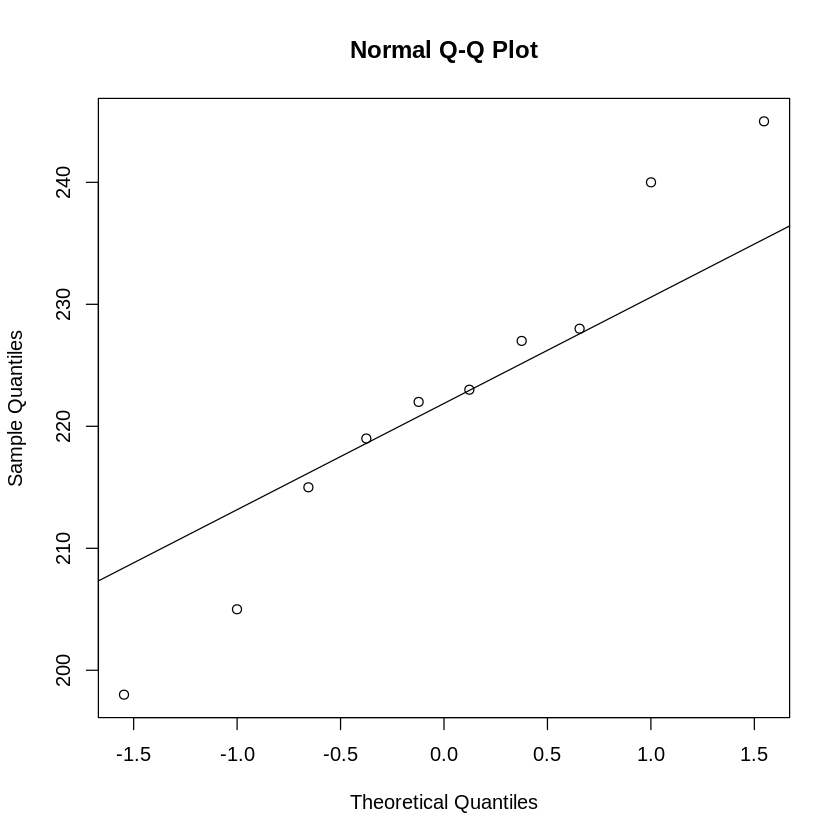

In [62]:
qqnorm(s)
qqline(s)

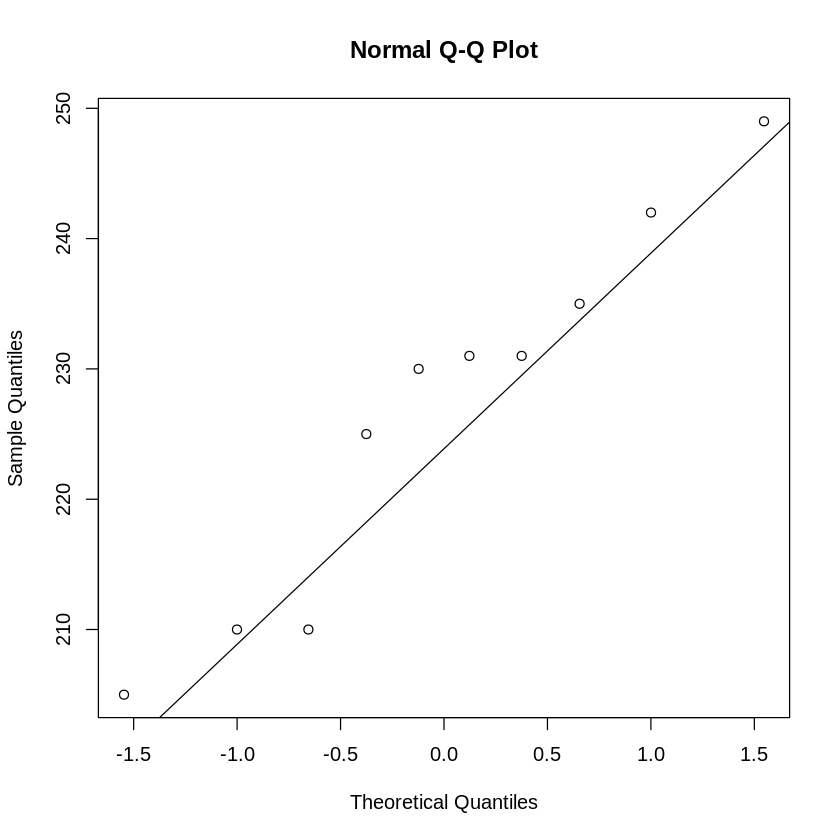

In [63]:
qqnorm(w)
qqline(w)